## Fit single-site binding curves to experiments at six temperatures to extract the van't Hoff enthalpy.
Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $17$, $25$, $30$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# 2017-05-15 12:32:28.212764
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: 1587.129728775262
# AICc: 1597.329728775262
# BIC: 1624.8370700022956
# F: 1666.089973427984
# Rsq: 0.9975242429326612
# Rsq_adjusted: 0.9969252694486276
# df: 63
# ln(L): -777.564864387631
# num_obs: 78
# num_param: 15
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,vh_K_ref,NA,9.05913e+03,2.64018e+02,8.53136e+03,9.58689e+03,False,1.00000e+00,-inf,inf
global,vh_dH_vanthoff,NA,-6.23434e+03,1.28138e+02,-6.49048e+03,-5.97819e+03,False,0.00000e+00,-inf,inf
global,g_competent,NA,1.47190e+00,1.18175e-02,1.44827e+00,1.49552e+00,False,1.00000e+00,5.00000e-01,1.50000e+00
local,dilution_intercept,temp-dependence/5C.DH,-7.42370e+00,5.86260e-01,-8.59562e+00,-6.25179e+00,False,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/5C.DH,1.18808e+04,1.46899e+03,8.94428e+03,1.48172e+04,False,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/10

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


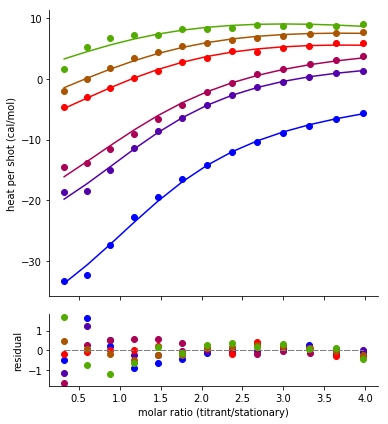

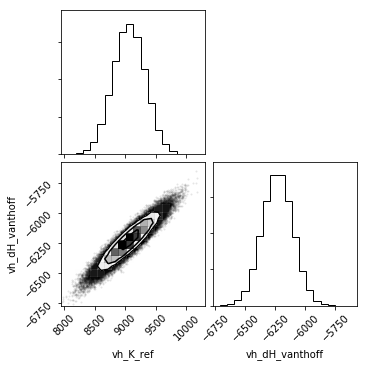

In [3]:
from pytc import global_connectors

# --------------------------------------------------------------------
# Create a global fitting instance
g1 = pytc.GlobalFit()
vh = pytc.global_connectors.VantHoff("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t5)
g1.link_to_global(t5,"dH",vh.dH)
g1.link_to_global(t5,"K",vh.K)
g1.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t10)
g1.link_to_global(t10,"dH",vh.dH)
g1.link_to_global(t10,"K",vh.K)
g1.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t17)
g1.link_to_global(t17,"dH",vh.dH)
g1.link_to_global(t17,"K",vh.K)
g1.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t25)
g1.link_to_global(t25,"dH",vh.dH)
g1.link_to_global(t25,"K",vh.K)
g1.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t30)
g1.link_to_global(t30,"dH",vh.dH)
g1.link_to_global(t30,"K",vh.K)
g1.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t35)
g1.link_to_global(t35,"dH",vh.dH)
g1.link_to_global(t35,"K",vh.K)
g1.link_to_global(t35,"fx_competent","g_competent")

g1.update_bounds("g_competent",(0.5,1.5))
g1.update_guess("vh_K_ref",1)

# Do fit
g1.fit()

# Show the results
fit, ax = g1.plot()
c = g1.corner_plot()
print(g1.fit_as_csv)
